# Download and display a file: easiest
from AMS 2019 openradar conference

In [1]:
import nexradaws
import tempfile
import os
import shutil
import pyart
from matplotlib import pyplot as plt
#import six


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


In [2]:
templocation = tempfile.mkdtemp()
conn = nexradaws.NexradAwsInterface()
scans = conn.get_avail_scans('2011', '05', '20','KTLX')


In [3]:
scans[10:20]

[<AwsNexradFile object - 2011/05/20/KTLX/KTLX20110520_004418_V03.gz>,
 <AwsNexradFile object - 2011/05/20/KTLX/KTLX20110520_004832_V03.gz>,
 <AwsNexradFile object - 2011/05/20/KTLX/KTLX20110520_005247_V03.gz>,
 <AwsNexradFile object - 2011/05/20/KTLX/KTLX20110520_005703_V03.gz>,
 <AwsNexradFile object - 2011/05/20/KTLX/KTLX20110520_010118_V03.gz>,
 <AwsNexradFile object - 2011/05/20/KTLX/KTLX20110520_010532_V03.gz>,
 <AwsNexradFile object - 2011/05/20/KTLX/KTLX20110520_010947_V03.gz>,
 <AwsNexradFile object - 2011/05/20/KTLX/KTLX20110520_011401_V03.gz>,
 <AwsNexradFile object - 2011/05/20/KTLX/KTLX20110520_011817_V03.gz>,
 <AwsNexradFile object - 2011/05/20/KTLX/KTLX20110520_012233_V03.gz>]

In [4]:
lcn = templocation
localfiles = conn.download(scans[10:20],lcn)

Downloaded KTLX20110520_004418_V03.gz
Downloaded KTLX20110520_005703_V03.gz
Downloaded KTLX20110520_005247_V03.gz
Downloaded KTLX20110520_004832_V03.gz
Downloaded KTLX20110520_010947_V03.gz
Downloaded KTLX20110520_010118_V03.gz
Downloaded KTLX20110520_010532_V03.gz
Downloaded KTLX20110520_011817_V03.gz
Downloaded KTLX20110520_011401_V03.gz
Downloaded KTLX20110520_012233_V03.gz
10 out of 10 files downloaded...0 errors


In [5]:
radar = pyart.io.read(localfiles.success[0].filepath)

/Users/bem/opt/miniconda3/envs/tropycal/lib/python3.10/site-packages/pyart/graph/radarmapdisplay.py:256: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes.
  warnings.warn("No projection was defined for the axes."
/Users/bem/opt/miniconda3/envs/tropycal/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_1_states_provinces_lines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/bem/opt/miniconda3/envs/tropycal/lib/python3.10/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())
/Users/bem/opt/miniconda3/envs/tropycal/lib/python3.10/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoA

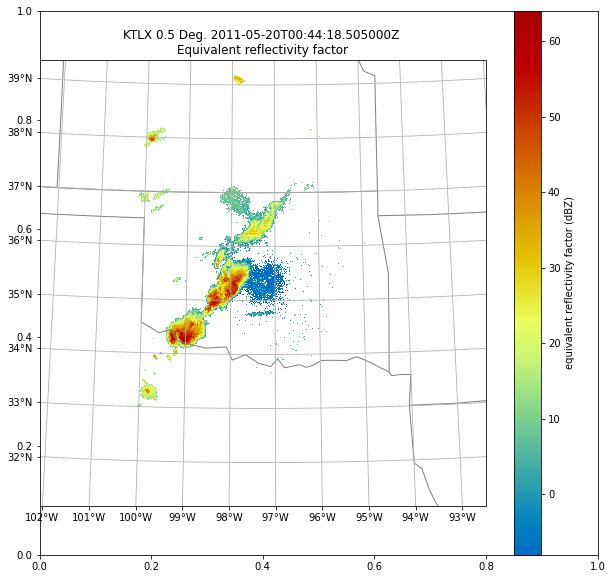

In [6]:
myf = plt.figure(figsize=[10,10])
myd = pyart.graph.RadarMapDisplay(radar)
myd.plot_ppi_map('reflectivity', 0, vmin=-8, vmax=64)